In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress


In [2]:
# Load Data
shopping_data = Path("shopping_trends_data.csv")
shopping_data_df = pd.read_csv(shopping_data)
shopping_data_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
shopping_data_df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [4]:
# Clean-up data
# Drop null values
shopping_data_df.dropna()

# Fix the Frequency of Purchases
for index, row in shopping_data_df.iterrows():
    if shopping_data_df.loc[index, "Frequency of Purchases"] == "Every 3 Months":
        shopping_data_df.loc[index, "Frequency of Purchases"] = "Half-Yearly"
    

shopping_data_df["Frequency of Purchases"].value_counts()    

Frequency of Purchases
Half-Yearly    584
Annually       572
Quarterly      563
Monthly        553
Bi-Weekly      547
Fortnightly    542
Weekly         539
Name: count, dtype: int64

In [5]:
# Gender, Category-wise statistics

print('Gender wise differentiation of Shoppers:')
shopping_data_df['Gender'].value_counts()

Gender wise differentiation of Shoppers:


Gender
Male      2652
Female    1248
Name: count, dtype: int64

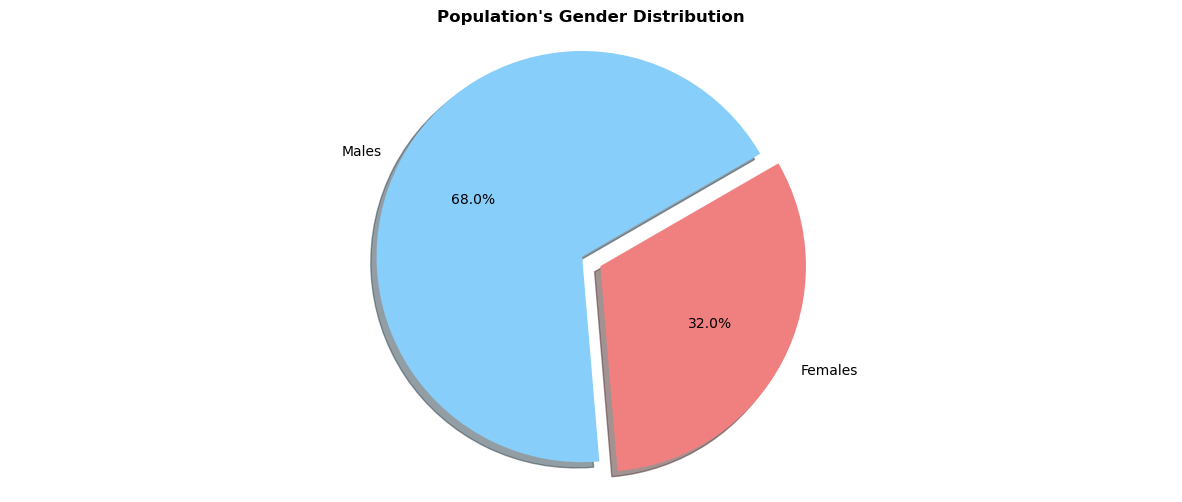

In [27]:
plt.figure(figsize = (15, 6))
population = shopping_data_df["Gender"].value_counts()
colors = ["lightskyblue", "lightcoral"]
labels = ["Males", "Females"]
explode = (0, 0.1)

plt.pie(population, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=30)

plt.axis("equal")
plt.title("Population's Gender Distribution", weight = "bold")
plt.show()


In [6]:
gender_df = shopping_data_df.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().unstack()
print("Total Amount Spent by Category:")
print(gender_df)

Total Amount Spent by Category:
Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female          23819     33636     11835       5901
Male            50381     70628     24258      12623


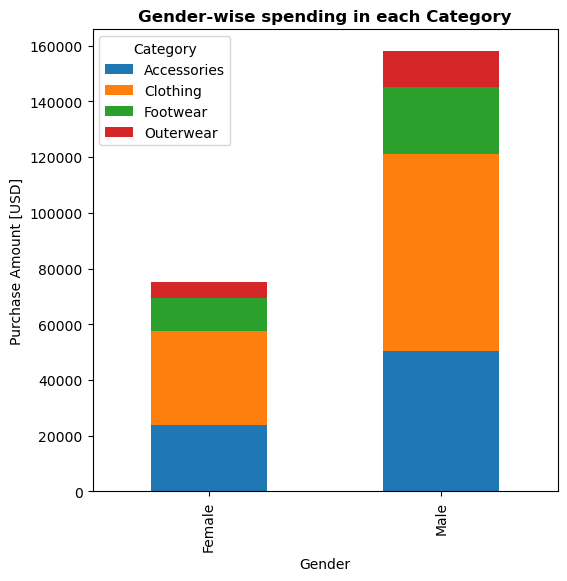

In [21]:
gender_df.plot(kind='bar', stacked = True, figsize=(6,6))
plt.ylabel("Purchase Amount [USD]")
plt.title('Gender-wise spending in each Category', weight = "bold")
plt.show()

In [15]:
# Gender wise Payment Method used
payment_type_df = shopping_data_df.groupby(['Payment Method', 'Gender'])['Purchase Amount (USD)'].sum().unstack()
print("Total Amount Spent using different Payment Methods:")
print(payment_type_df)

Total Amount Spent using different Payment Methods:
Gender          Female   Male
Payment Method               
Bank Transfer    12174  24370
Cash             12437  27565
Credit Card      13350  26960
Debit Card       11309  27433
PayPal           13524  26585
Venmo            12397  24977


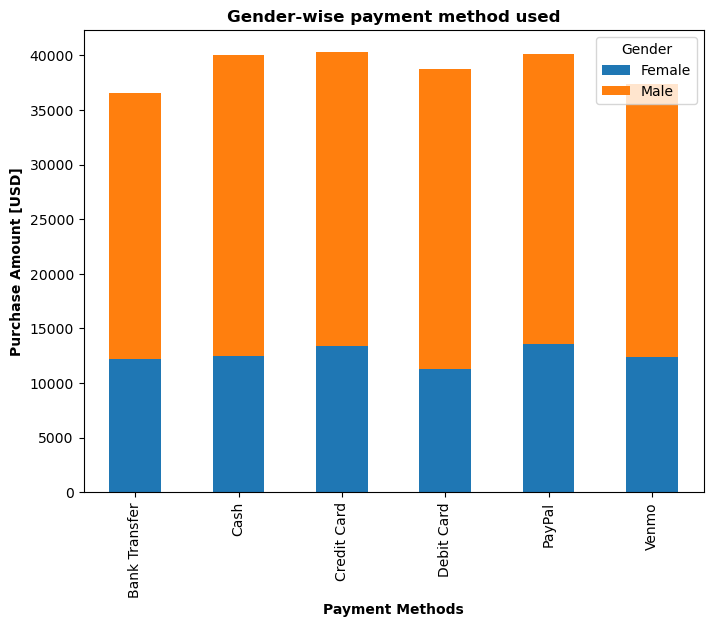

In [20]:
payment_type_df.plot(kind='bar', stacked = True, figsize=(8,6))
plt.xlabel("Payment Methods", weight = "bold")
plt.ylabel("Purchase Amount [USD]", weight = "bold")
plt.title('Gender-wise payment method used', weight = 'bold')
plt.show()

In [8]:
# Spending Category-Wise 

Average_Accessories = shopping_data_df[shopping_data_df["Category"] == "Accessories"]["Purchase Amount (USD)"].astype(float).mean()
print(f"The average spending on Accesories is '{Average_Accessories}")
Average_Clothing = shopping_data_df[shopping_data_df["Category"] == "Clothing"]["Purchase Amount (USD)"].astype(float).mean()    
print(f"The average spending on Clothing is '{Average_Clothing}")
Average_Outerwear = shopping_data_df[shopping_data_df["Category"] == "Outerwear"]["Purchase Amount (USD)"].astype(float).mean()
print(f"The average spending on Outerwear is '{Average_Outerwear}")
Average_Footwear = shopping_data_df[shopping_data_df["Category"] == "Footwear"]["Purchase Amount (USD)"].astype(float).mean()
print(f"The average spending on Footwear is '{Average_Footwear}")

The average spending on Accesories is '59.83870967741935
The average spending on Clothing is '60.025331030512376
The average spending on Outerwear is '57.17283950617284
The average spending on Footwear is '60.25542570951586


In [9]:
#Making bins for age group 

bins = [18, 25, 40, 65, 70]  # Define the age bins
labels = ['18-25', '26-40', '41-65', '66-70']


In [10]:
by_age = shopping_data_df.copy()  #copy of original frame
by_age['Age Group'] = pd.cut(shopping_data_df['Age'], bins=bins, labels=labels) 
by_age

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,41-65
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,41-65
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,26-40
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,41-65
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,41-65
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,41-65


In [11]:
# What is the average spending by Age group?
average_purchase_by_age_group = by_age.groupby('Age Group')['Purchase Amount (USD)'].mean()
average_purchase_by_age_group
print(average_purchase_by_age_group)


Age Group
18-25    60.739044
26-40    59.693563
41-65    59.703367
66-70    58.884507
Name: Purchase Amount (USD), dtype: float64


In [12]:
# What are the most popular product categories among different age groups?

total_spent_by_group = by_age.groupby(['Category', 'Age Group'])['Purchase Amount (USD)'].sum().reset_index()
sorted_total_spent = total_spent_by_group.sort_values(by='Purchase Amount (USD)', ascending=False)
print(sorted_total_spent)


       Category Age Group  Purchase Amount (USD)
6      Clothing     41-65                  49360
2   Accessories     41-65                  34755
5      Clothing     26-40                  28864
1   Accessories     26-40                  22000
10     Footwear     41-65                  18288
4      Clothing     18-25                  14228
9      Footwear     26-40                  10195
7      Clothing     66-70                   9819
0   Accessories     18-25                   9478
14    Outerwear     41-65                   9302
3   Accessories     66-70                   6934
13    Outerwear     26-40                   4783
8      Footwear     18-25                   4291
11     Footwear     66-70                   2761
12    Outerwear     18-25                   2494
15    Outerwear     66-70                   1390
